# PeakProphet Full Demo

This demonstrates the `peak_prophesize()` function which:
- Takes a ChemicalReaction and measurement manager (LCMSMeasMan or LCMSUVMeasMan)
- Scores all compound-peak pairs
- Performs optimal assignment
- Generates a SpecSummary JSON file saved to the results directory

## Step 1: Imports and Declarations

Make imports and declare a chemical reaction with LC-MS setup.

In [1]:
import sys
from pathlib import Path
import asyncio

from decoding.LCMSUV_meas_man import LCMSUVMeasMan
from mocca2 import example_data
from predictions.utils.rxn_classes import ChemicalReaction
from assignment.specsummary import peak_prophesize

reactants = ["CS(=O)(O[Pd]c1c(c2c(N)cccc2)cccc1)=O.COc3c(P(C4CCCCC4)C5CCCCC5)c(c6c(C(C)C)cc(C(C)C)cc6C(C)C)c(OC)cc3", "Ic1ccc(cc1)c2ccccc2", "CC(N)c1ccccc1", "[Na+].C(C)(C)[O-]"]
solvent = "O1CCOCC1"

lcms_solvents = {
    'A': [{'O': 100}, {'C(=O)O': 0.0265}],
    'B': [{'CC#N': 80, 'O': 20}, {'C(=O)O': 0.0265}]
}
lcms_gradient = [(0, 0), (5, 100), (5.5, 0), (6, 0)]
lcms_column = ('RP', 2.1, 100, 2.6)
lcms_flow_rate = 0.4
lcms_temp = 65

rxn = ChemicalReaction(
    reactants=reactants,
    solvent=solvent,
    lcms_solvents=lcms_solvents,
    lcms_gradient=lcms_gradient,
    lcms_column=lcms_column,
    lcms_flow_rate=lcms_flow_rate,
    lcms_temp=lcms_temp
)

Determination of memory status is not supported on this 
 platform, measuring for memoryleaks will never fail


## Step 2: Make Predictions

Call appropriate functions on the ChemicalReaction object to obtain predicted data.

In [2]:

# predict prducts, lambda max, rt, and mass spec adducts
async def fetch_products():
    return await rxn.fetch_products_from_askcos()

products = await fetch_products()

predicted_rts = rxn.predict_products_retention_times()
pred_lmaxs = rxn.predict_products_lambda_max()
rxn.predict_products_ms_adducts(mode="positive")


Combined reactants: CS(=O)(O[Pd]c1c(c2c(N)cccc2)cccc1)=O.COc3c(P(C4CCCCC4)C5CCCCC5)c(c6c(C(C)C)cc(C(C)C)cc6C(C)C)c(OC)cc3.Ic1ccc(cc1)c2ccccc2.CC(N)c1ccccc1.[Na+].C(C)(C)[O-]
Navigating to ASKCOS forward page...
Navigating to Product Prediction tab...
Clicked Product Prediction tab
Navigating to Reactants tab
Entered Reactants
Navigating to Solvents tab
Entered Solvents
Navigating to Results button...
Clicked Get Results button
Navigating to Export button...
Clicked Export button


INFO:predictions.rt_pred.pred_rt:Loading ReTiNA_XGB1 model from /Users/nathanleung/Documents/peak_prophet/predictions/rt_pred/ReTiNA_XGB1/ReTINA_XGB1.json
INFO:predictions.rt_pred.pred_rt:ReTiNA_XGB1 model loaded successfully
INFO:predictions.rt_pred.pred_rt:Making predictions for 49 compounds
INFO:predictions.lmax_pred.pred_lmax:Loading AMAX_XGB1 model from /Users/nathanleung/Documents/peak_prophet/predictions/lmax_pred/AMAX_XGB1/AMAX_XGB1.json
INFO:predictions.lmax_pred.pred_lmax:AMAX_XGB1 model loaded successfully
INFO:predictions.lmax_pred.pred_lmax:Making predictions for 49 (compound, solvent) pairs


[PredictedProduct(smiles='CS(=O)(O[Pd]c1c(c2c(N)cccc2)cccc1)=O.COc3c(P(C4CCCCC4)C5CCCCC5)c(c6c(C(C)C)cc(C(C)C)cc6C(C)C)c(OC)cc3', RT=467.03s, λmax=455.79nm, MS=31 adducts),
 PredictedProduct(smiles='Ic1ccc(cc1)c2ccccc2', RT=391.57s, λmax=296.68nm, MS=31 adducts),
 PredictedProduct(smiles='CC(N)c1ccccc1', RT=167.56s, λmax=296.23nm, MS=31 adducts),
 PredictedProduct(smiles='[Na+].C(C)(C)[O-]', RT=75.28s, λmax=317.28nm, MS=31 adducts),
 PredictedProduct(smiles='O1CCOCC1', RT=29.98s, λmax=467.66nm, MS=31 adducts),
 PredictedProduct(smiles='CC(Nc1ccc(-c2ccccc2)cc1)c1ccccc1', RT=449.77s, λmax=309.30nm, MS=31 adducts),
 PredictedProduct(smiles='CS(=O)(=O)O[Pd]c1ccccc1-c1ccccc1Nc1ccc(-c2ccccc2)cc1', RT=387.50s, λmax=417.30nm, MS=31 adducts),
 PredictedProduct(smiles='c1ccc(-c2ccccc2)cc1', RT=377.06s, λmax=248.30nm, MS=31 adducts),
 PredictedProduct(smiles='Nc1ccc(-c2ccccc2)cc1', RT=284.85s, λmax=286.00nm, MS=31 adducts),
 PredictedProduct(smiles='CC(c1ccccc1)N(c1ccc(-c2ccccc2)cc1)C(C)(C)[O-]',

## Step 3: Process Raw LC-MS Data with Measurement Manager

Use a LCMSMeasMan or LCMSUVMeasMan to extract relevant data from .mzML and .csv files.

Loading MS data from data/msdata30.mzXML...
Loading data/msdata30.mzXML...
Detected mzXML format
Using: MS+ (positive mode) - 1800 points found
MS+ only data: 1800 points
RT range: 0.00 - 359.80 s (0.00 - 6.00 min)
Skipping TIC peak picking (peaks will be provided from external source)
Loading UV-Vis data from data/uvdata30.csv...
Trying encoding: utf-8...
Successfully loaded with utf-8 encoding
Converted UV-Vis time axis from minutes to seconds to match MS data
No wavelength range specified, using default: 220-400 nm
Extracting wavelength range 220-400 nm...
Wavelength extraction complete. Data shape: (140, 564)
Correcting baseline using flatfit method...
Baseline correction complete
Finding peaks...
  Data dimensions: 140 wavelengths × 564 time points
Peak finding complete. Found 4 peaks
Skipping peak deconvolution (skip_deconvolution=True)
  If you need deconvolution, set skip_deconvolution=False
Peak 1: RT=22.400 min, Boundaries: 22.400 - 23.040 min, Lambda max: 219.5 nm, Local max

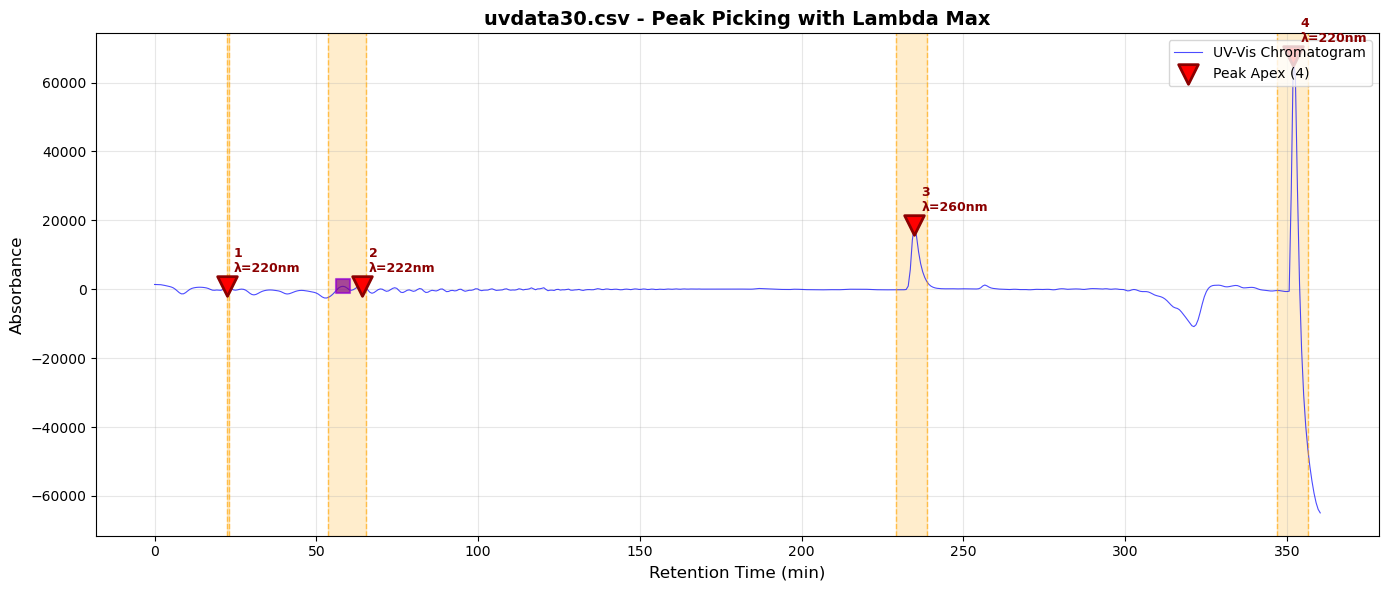

In [3]:
# initialize LCMSUVMeasMan with msdata30.mzXML for MS and mocca2 uvdata30.csv for UV-Vis

mzml_path = "data/msdata30.mzXML"
uv_path = "data/uvdata30.csv"

lcmsuv_man = LCMSUVMeasMan(
    mzml_path=str(mzml_path),
    uvvis_path=str(uv_path),
    ms_polarity=1
)

lcmsuv_man.plot_uvvis_with_peaks()


## Step 4: Output Optimal Peak Assignments

Call `peak_prophesize` to output SpecSummary data.

In [5]:
spec_summary = peak_prophesize(
    rxn_name="Example",
    reaction=rxn,
    meas_man=lcmsuv_man,
    weights={"rt": 0.2, "uv": 0.2, "ms": 0.5, "prior": 0.1},
    rt_sigma=0.3,
    lmax_sigma=5.0,
    ms_ppm=5.0,
    use_relative_rt=True,
    min_score=0.35,
    top_k=5
)

print(f"\nSpecSummary generated!")
print(f"Contains UV: {spec_summary['contains_UV']}")
print(f"Number of peaks: {len(spec_summary['peaks'])}")
if spec_summary.get('lambda_range'):
    print(f"Lambda range: {spec_summary['lambda_range']}")


SpecSummary saved to: results/SpecSummary_Example.json

SpecSummary generated!
Contains UV: True
Number of peaks: 4
